# **Implementasi Decision Tree Iris Dataset (Tugas 6)**

## Konsep Decision Tree
Decision tree merupakan sebuah algoritma yang dapat digunakan untuk klasifikasi dan regresi.
Kelebihan menggunaka Decision Tree 


1.   Sederhana untuk dipahami dan diimplementasikan
2.   Membutuhkan sedikit persiapan data


Kekurangan menggunakan Decision Tree:


1.   Prediksi Decision tree tidak  atau kontinu.
2.   Decision Tree dapat menjadi tidak stabil karena variasi kecil dalam data





## Rumus Yang Digunakan

$$Gain = 1 - \sum \limits_{i=1}^{n} {p^2 (c_{i})} $$
Atau bisa juga menggunakan rumus 
entrhopy \begin{align} Entropy(D_1) = -\sum_{i=1}^m p_i \ log{_2} \ p_i \end{align}

Dimana :

P = Probabilitas 

## Import Library

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import graphviz
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Get iris dataset

In [11]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

## Modifikasi dataset

In [12]:

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Modifying the dataset
X[y==1,2] = X[y==1,2] + 0.3

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.5, random_state=2)

# Decreasing the train set to make things more interesting
X_train = X_train[30:,:]
Y_train = Y_train[30:,:]

## Visualisasi Dataset

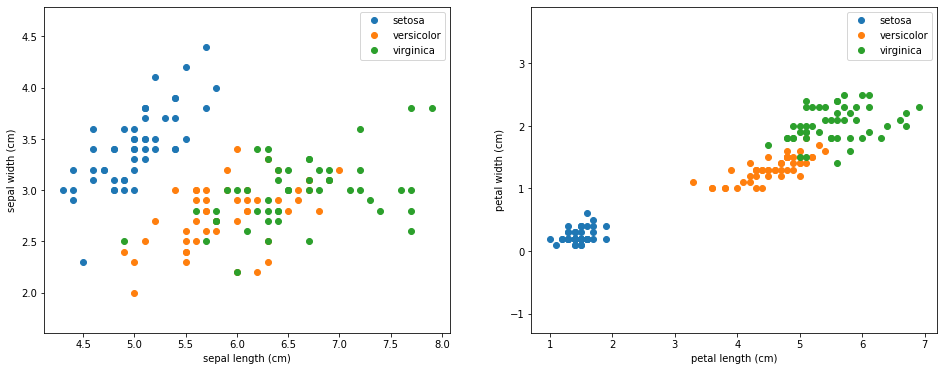

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();
plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

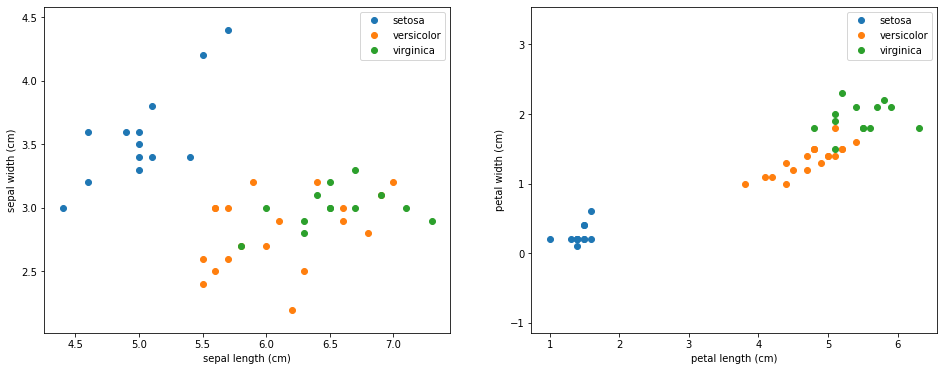

In [14]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X_train[Y_train[:,target] == 1]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();
plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X_train[Y_train[:,target] == 1]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

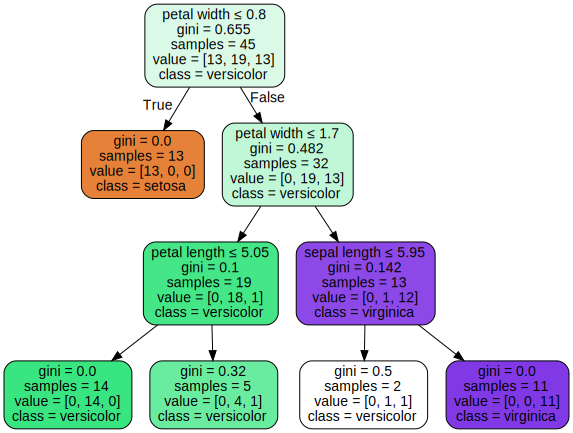

In [15]:
iristree = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=0)
iristree.fit(X_train, enc.inverse_transform(Y_train))
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
dot_data = tree.export_graphviz(iristree, out_file=None, 
                      feature_names=feature_names,  
                      class_names=names,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
display(graph)

## Hasil Predict

In [16]:
iristrainpred = iristree.predict(X_train)
iristestpred = iristree.predict(X_test)

# train precision:
display(precision_score(enc.inverse_transform(Y_train), iristrainpred.reshape(-1,1), average='micro', labels=[0]))
display(precision_score(enc.inverse_transform(Y_train), iristrainpred.reshape(-1,1), average='micro', labels=[1]))
display(precision_score(enc.inverse_transform(Y_train), iristrainpred.reshape(-1,1), average='micro', labels=[2]))

# test precision:
display(precision_score(enc.inverse_transform(Y_test), iristestpred.reshape(-1,1), average='micro', labels=[0]))
display(precision_score(enc.inverse_transform(Y_test), iristestpred.reshape(-1,1), average='micro', labels=[1]))
display(precision_score(enc.inverse_transform(Y_test), iristestpred.reshape(-1,1), average='micro', labels=[2]))

1.0

0.9047619047619048

1.0

1.0

0.7586206896551724

0.9473684210526315